<a href="https://colab.research.google.com/github/alishaphaiju2006/Math-worksheet/blob/main/worksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
diabetes= pd.read_csv("diabetes_.csv")
diabetes.head()


Saving diabetes_.csv to diabetes_ (2).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()
diabetes.describe()
diabetes.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#Problem-1
#Handling Missing Values

columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_zero:
    diabetes[col] = diabetes[col].replace(0, diabetes[col].mean())

diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
#Feature Engineering
import numpy as np

X = diabetes.drop(columns=['Outcome']).values
y = diabetes['Outcome'].values



In [ ]:
#Implement KNN
#Test
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_size_count = int(len(X) * test_size)
    test_idx = indices[:test_size_count]
    train_idx = indices[test_size_count:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)


In [ ]:
#Euclidean Distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

#Single Prediction
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_idx = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_idx]
    return np.bincount(nearest_labels).argmax()

#Multiple Prediction
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

#Accuracy
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

#Run the model
predictions = knn_predict(X_test, X_train, y_train, k=5)
accuracy = compute_accuracy(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}%")



Accuracy: 66.96%


In [ ]:
#Problem -2
#Min-Max Feature Scaling (From Scratch)
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = min_max_scale(X)

#Train-Test Split on Scaled Data
Xs_train, Xs_test, ys_train, ys_test = train_test_split_scratch(X_scaled, y)

#KNN on Scaled Data
scaled_predictions = knn_predict(Xs_test, Xs_train, ys_train, k=5)
scaled_accuracy = compute_accuracy(ys_test, scaled_predictions)

print(f"Accuracy (Scaled Data): {scaled_accuracy:.2f}%")


Accuracy (Scaled Data): 74.78%


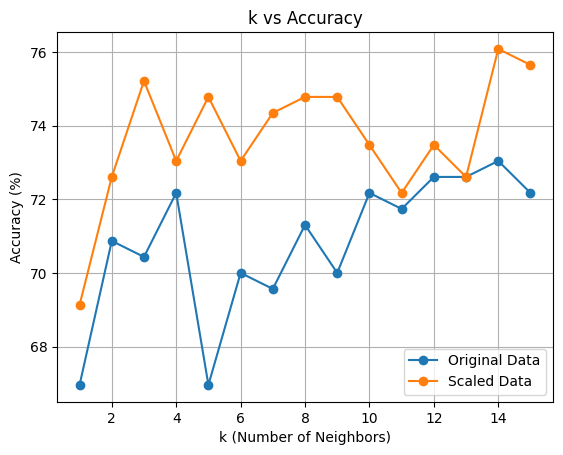

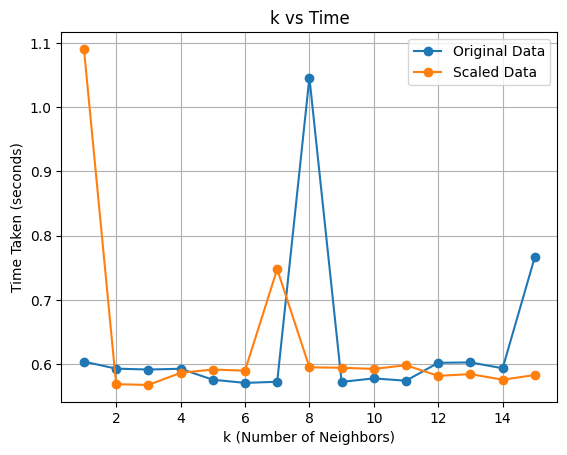

In [ ]:
#Problem-3
#Measure Accuracy & Time

import time

k_values = range(1, 16)

acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    # Original data
    start = time.time()
    pred = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, pred))

    # Scaled data
    start = time.time()
    pred_s = knn_predict(Xs_test, Xs_train, ys_train, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(ys_test, pred_s))

#Plot k vs Accuracy
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, acc_original, marker='o', label='Original Data')
plt.plot(k_values, acc_scaled, marker='o', label='Scaled Data')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()

#Plot k vs Time Taken
plt.figure()
plt.plot(k_values, time_original, marker='o', label='Original Data')
plt.plot(k_values, time_scaled, marker='o', label='Scaled Data')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Time")
plt.legend()
plt.grid()
plt.show()


